In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import warnings
import warnings
warnings.filterwarnings('ignore')

#Check scikit-learn version
import sklearn
print('Sklearn_version:',sklearn.__version__)

Sklearn_version: 0.19.1


In [2]:
#To Display all the columns
pd.set_option('display.max_columns',None)

In [3]:
#Loading the datasets
df_cases = pd.read_csv('Country_wise_COVID_cases.csv', parse_dates = ['Date'])
df_cases.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [4]:
df_ages = pd.read_csv('Age_ratio_country_wise.csv')
df_ages.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


### Now From here we first analyzed the COVID case dataset and after that Age ratio.

#### Covid_Cases_country_wise dataset.

In [5]:
#Checking the first five rows of the data
df_cases.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [6]:
#Checking the last five rows of the data
df_cases.tail()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0
6602,2020-05-18,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0


In [7]:
#Checking the columns
df_cases.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases'],
      dtype='object')

In [8]:
#Cheking the shape 
df_cases.shape

(6603, 9)

In [9]:
#Checking the datatype
df_cases.dtypes

Date                   datetime64[ns]
Country                        object
Population                      int64
Total Tests                   float64
Total Cases                   float64
Total Deaths                  float64
Total Recovered               float64
Serious or Critical           float64
Active Cases                  float64
dtype: object

In [10]:
#Checking the information
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
Date                   6603 non-null datetime64[ns]
Country                6603 non-null object
Population             6603 non-null int64
Total Tests            5505 non-null float64
Total Cases            6554 non-null float64
Total Deaths           5367 non-null float64
Total Recovered        6318 non-null float64
Serious or Critical    4117 non-null float64
Active Cases           6544 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 464.4+ KB


Observation:
    
    1-The dataset consist of object, datetime and numeric columns.
    
    2-The information shows that there are null values in the dataset which needs to be removed.

## To check the missing values

In [11]:
#Checking the missing values in our dataset
df_cases.isnull().values.any()

True

In [12]:
#Checking the number of missing values in columns
df_cases.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

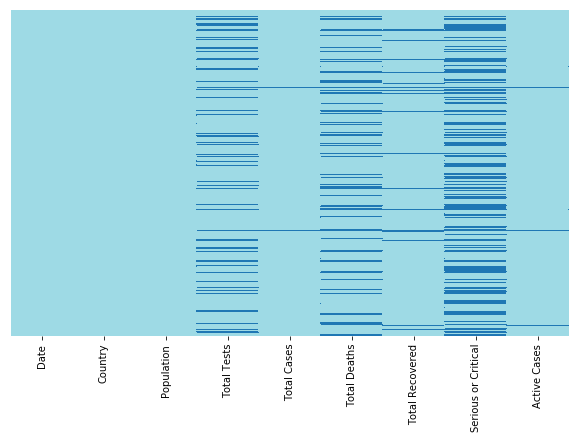

In [13]:
#Seeing the null values via visualization
plt.figure(figsize=(10,6))
sns.heatmap(df_cases.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')
plt.show()

Observation:
    
    From this visualization we clearly see that there are missing values in some columns which needs to fillup.
    
    Total Tests            1098
    Total Cases              49
    Total Deaths           1236
    Total Recovered         285
    Serious or Critical    2486
    Active Cases             59

In [14]:
#Filling the null values with zero
df_cases = df_cases.replace(np.NaN,0)

In [15]:
#Now again checking for null values
df_cases.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

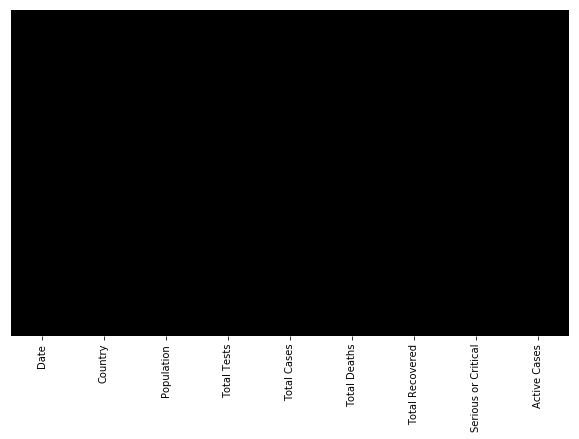

In [16]:
#Seeing the null values via visualization
plt.figure(figsize=(10,6))
sns.heatmap(df_cases.isnull(),yticklabels=False,cbar=False,cmap='copper')
plt.show()

Now all the null values are replace with zero.

# Summary Statistics

In [17]:
#Checking the summary of the dataset
df_cases.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03
mean,3.637913e+07,1.806864e+05,1.680405e+04,1151.147206,5602.691201,241.139331,9.875109e+03
std,1.411537e+08,6.981654e+05,8.829716e+04,6016.411612,22986.345036,1322.814259,6.512407e+04
min,8.010000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,8.672680e+05,5.720000e+02,7.600000e+01,1.000000,17.000000,0.000000,2.500000e+01
50%,6.859926e+06,1.076100e+04,5.940000e+02,11.000000,183.000000,2.000000,2.600000e+02
75%,2.546422e+07,1.019110e+05,4.757000e+03,109.000000,1302.500000,27.000000,1.991000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


Observation:
    
    1-Mean is greater than median in all features means all the columns are right skewed in all numerical feature.
    
    2-The difference between 75% and max is higher in all the columns means outliers are present.
    
    3-Maximum serious cases are 18671 and minimum is zero.
    
    4-Maximum deaths is 91981 people and mean death is 1151.
    
    5-The maximum number of people recovered from this disease are 356383.

## To check the correlation

In [18]:
#Checking the correlation
df_cor=df_cases.corr()
df_cor

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Population,1.000000,0.216558,0.226144,0.184892,0.310775,0.172346,0.179594
Total Tests,0.216558,1.000000,0.898474,0.812389,0.795354,0.745878,0.855270
Total Cases,0.226144,0.898474,1.000000,0.935250,0.818957,0.892289,0.975015
Total Deaths,0.184892,0.812389,0.935250,1.000000,0.795902,0.833374,0.881876
Total Recovered,0.310775,0.795354,0.818957,0.795902,1.000000,0.723509,0.685120
Serious or Critical,0.172346,0.745878,0.892289,0.833374,0.723509,1.000000,0.875839
Active Cases,0.179594,0.855270,0.975015,0.881876,0.685120,0.875839,1.000000


Here we can see the correlation between the columns.

For Better understanding we can see it via visualization(with the help of heatmap).

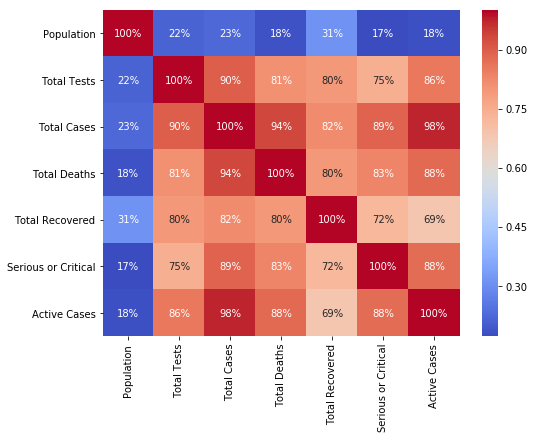

In [19]:
#Checking the correlation via heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='coolwarm')
plt.show()

Observation:
    
    In this dataset all the columns are highly positive correlated with each other except population columns.

## Feature Engineering

The Case Fatality Rate (CFR) represent the proportionof caseswho eventually die from a disease. Once the pandemic has ended,
it is calculated with the formula: deaths/cases.
    
But while the pandemic is still going, this formula is at the very least,'naive' and can be 'misleading if,at the time of
analysis,the outcome is unknown for a non negligible proportion of patients.'

So we can use formula to calculate CFR = (deaths/(deaths + recovered)) * 100

In [20]:
#Creating the new column case fatality rate.
df_cases['CFR'] = (df_cases['Total Deaths']/(df_cases['Total Deaths'] + df_cases['Total Recovered'])) * 100

The true severity of a disease can be described byb the Infection Fatality Ratio (IFR).

So we can use formula to calculate IFR = (deaths/cases) * 100

In [21]:
#Creating the new column infection fatality ratio
df_cases['IFR'] = (df_cases['Total Deaths']/df_cases['Total Cases'] * 100)

In [22]:
#Checking the dataset
df_cases.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,CFR,IFR
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,36.365501,5.280783
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,9.287834,0.850705
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,21.133488,10.309337
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,14.407762,6.429388
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,0.0,1559.0,98409.0,100.000000,13.539140


In [23]:
#Checking the null values
df_cases.isnull().sum()

Date                     0
Country                  0
Population               0
Total Tests              0
Total Cases              0
Total Deaths             0
Total Recovered          0
Serious or Critical      0
Active Cases             0
CFR                    176
IFR                     49
dtype: int64

In [24]:
#Dropping the null values

df_cases.dropna(inplace=True)

In [25]:
#Now again checking for null values
df_cases.isnull().values.any()

False

In [26]:
#Checking the null values in columns
df_cases.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
CFR                    0
IFR                    0
dtype: int64

In [27]:
#Now Checking the shape
df_cases.shape

(6427, 11)

Now our COVID_19 cases dataset is prepare.

### Age ratio country wise dataset

In [28]:
#Checking the first five rows of the dataset
df_ages.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [29]:
#Checking the shape
df_ages.shape

(213, 4)

In [30]:
#Checking the columns
df_ages.columns

Index(['Country', 'Fraction age 0-14 years', 'Fraction age 15-64 years',
       'Fraction age 65+ years'],
      dtype='object')

In [31]:
#Checking the data types of the columns
df_ages.dtypes

Country                      object
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

In [32]:
#Checking the information of the datatype
df_ages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
Country                     213 non-null object
Fraction age 0-14 years     176 non-null float64
Fraction age 15-64 years    176 non-null float64
Fraction age 65+ years      176 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.7+ KB


Observation:
    
    1-The datatype consist of 213 rows and 4 columns.
    
    2-Three columns are numeric and one column is objective.
    
    3-There are null values in the dataset which needs to be removed

## To check the missing values

In [33]:
#Checking the missing values
df_ages.isnull().sum()

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

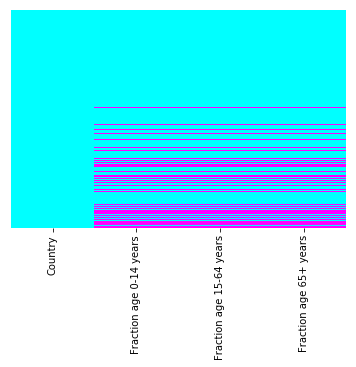

In [34]:
#Seeing it via heatmap(visualization)

sns.heatmap(df_ages.isnull(),yticklabels=False,cbar=False,cmap='cool')
plt.show()

Finding:

    Missing value present in numeric columns than fill with mean or median.

In [35]:
#Filling the missing values by mean in numeric columns

df_ages['Fraction age 0-14 years'].fillna(df_ages['Fraction age 0-14 years'].mean(),inplace=True)
df_ages['Fraction age 15-64 years'].fillna(df_ages['Fraction age 15-64 years'].mean(),inplace=True)
df_ages['Fraction age 65+ years'].fillna(df_ages['Fraction age 65+ years'].mean(),inplace=True)

In [36]:
#Now again checking the missing values
df_ages.isnull().sum()

Country                     0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

## Summary Statistics

In [37]:
#Checking the summary of the dataset
df_ages.describe()

,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,213.000000,213.000000,213.000000
mean,0.276098,0.636109,0.087731
std,0.096986,0.060458,0.056805
min,0.115000,0.472000,0.011000
25%,0.191000,0.607000,0.038000
50%,0.276098,0.638000,0.085000
75%,0.335000,0.667000,0.114000
max,0.502000,0.850000,0.270000


Observatin:
    
    1-The fraction of age between 0-14 is only approx 28% which is infected by this disease.
    
    2-The maximum number of people infected by this disease is age group of 15 to 64 years.

# Now Adding both the data set 

In [38]:
#Concating the dataset
df=pd.merge(df_cases,df_ages, on='Country')

In [39]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,CFR,IFR,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,36.365501,5.280783,0.189,0.657,0.154
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,36.352146,5.309152,0.189,0.657,0.154
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,36.999904,5.362790,0.189,0.657,0.154
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,35.338152,5.535063,0.189,0.657,0.154
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,36.185075,5.615417,0.189,0.657,0.154


In [40]:
#Checking the shape of our final dataset
df.shape

(6427, 14)

Observation:
    
    Now our final dataset contains 6427 rows and 14 columns.

## Summary Statistics

In [41]:
#Summary Statistics
df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,CFR,IFR,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,6.427000e+03,6.427000e+03,6.427000e+03,6427.000000,6427.000000,6427.000000,6.427000e+03,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000
mean,3.725433e+07,1.856309e+05,1.726405e+04,1182.670764,5756.117940,247.742804,1.014536e+04,13.005283,3.958041,0.274408,0.636939,0.088586
std,1.429693e+08,7.070133e+05,8.945380e+04,6095.187986,23280.039081,1340.196694,6.598912e+04,18.436568,4.274153,0.097131,0.060720,0.057057
min,8.010000e+02,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.115000,0.472000,0.011000
25%,8.945570e+05,7.760000e+02,8.500000e+01,2.000000,22.000000,0.000000,2.900000e+01,1.785714,0.709677,0.189000,0.614000,0.039000
50%,6.954222e+06,1.187000e+04,6.570000e+02,12.000000,200.000000,3.000000,2.920000e+02,6.930693,2.801120,0.276098,0.642000,0.086000
75%,2.629474e+07,1.085050e+05,5.179000e+03,121.000000,1374.000000,30.000000,2.156500e+03,15.740937,5.809061,0.329000,0.669000,0.129000
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06,100.000000,33.333333,0.502000,0.850000,0.270000


Observation:

    1-Mean is greater than median in all features means all the columns are right skewed in all numerical feature.

    2-The difference between 75% and max is higher in all the columns means outliers are present.

    3-Maximum serious cases are 18671 and minimum is zero.

    4-Maximum deaths is 91981 people and mean death is 1151.

    5-The maximum number of people recovered from this disease are 356383.
    
    6-The fraction of age between 0-14 is only approx 28% which is infected by this disease.

    7-The maximum number of people infected by this disease is age group of 15 to 64 years.

## To check the correlation

In [42]:
df_cor=df.corr()
df_cor

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,CFR,IFR,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
Population,1.000000,0.215308,0.225240,0.183932,0.309742,0.171418,0.178841,0.015404,0.039248,-0.036454,0.068816,-0.010498
Total Tests,0.215308,1.000000,0.898395,0.812185,0.795002,0.745609,0.855250,0.063921,0.078883,-0.229948,0.132256,0.251569
Total Cases,0.225240,0.898395,1.000000,0.935185,0.818759,0.892188,0.975016,0.115640,0.130625,-0.168958,0.075260,0.208087
Total Deaths,0.183932,0.812185,0.935185,1.000000,0.795671,0.833215,0.881801,0.206961,0.246110,-0.188642,0.048328,0.270091
Total Recovered,0.309742,0.795002,0.818759,0.795671,1.000000,0.723209,0.684881,0.011122,0.149547,-0.225600,0.118279,0.259236
Serious or Critical,0.171418,0.745609,0.892188,0.833215,0.723209,1.000000,0.875756,0.104247,0.137920,-0.159241,0.083909,0.182275
Active Cases,0.178841,0.855250,0.975016,0.881801,0.684881,0.875756,1.000000,0.120063,0.094749,-0.129171,0.055794,0.160858
CFR,0.015404,0.063921,0.115640,0.206961,0.011122,0.104247,0.120063,1.000000,0.586117,0.026221,-0.131481,0.094679
IFR,0.039248,0.078883,0.130625,0.246110,0.149547,0.137920,0.094749,0.586117,1.000000,-0.024640,-0.095132,0.141826
Fraction age 0-14 years,-0.036454,-0.229948,-0.168958,-0.188642,-0.225600,-0.159241,-0.129171,0.026221,-0.024640,1.000000,-0.837095,-0.812626


Here we can see the correlation between the columns.

For Better understanding we can see it via visualization(with the help of heatmap).

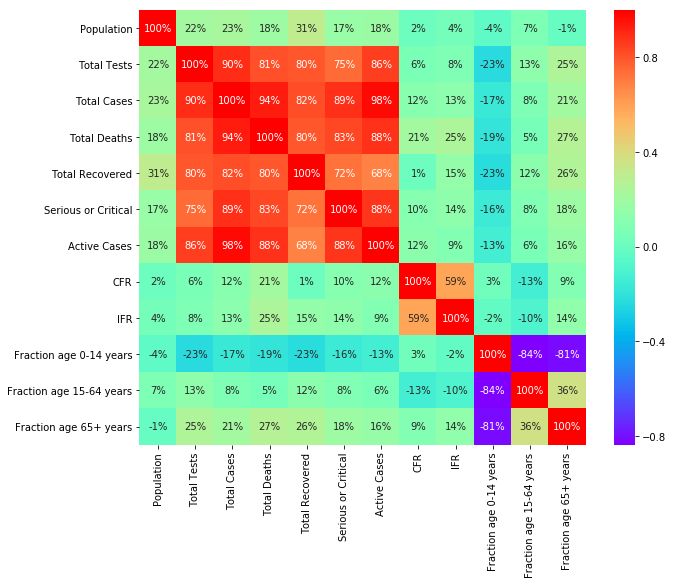

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='rainbow')
plt.show()

Observation:
    
    1-Fraction of age between 0 to 14 is highly negatively correlated with Total Tests, Total Cases, Total Deaths, Total
    
      Recovered, Serious or Critical case,and Active cases.
    
    2-Fraction of age between 15 to 65 is slightly positive correlated with Total Tests, Total Cases, Total Deaths, Total
    
      Recovered, Serious or Critical case,and Active cases.
        
    3-Fraction of age 65+ is moderately positive correlated with Total Tests, Total Cases, Total Deaths, Total
    
      Recovered, Serious or Critical case,and Active cases.
        
    4-This observation shows that age group of 65+ years have very high chance to get infected with this disease.

# Exploratory Data Analysis

In [44]:
df.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases', 'CFR', 'IFR', 'Fraction age 0-14 years',
       'Fraction age 15-64 years', 'Fraction age 65+ years'],
      dtype='object')

In [45]:
#Checking the country where maximum confirmed cases are present

most_affected_country=df.groupby(by=df['Country'])['Total Cases'].sum().sort_values(ascending=False).reset_index()
most_affected_country.head(5)

,Country,Total Cases
0,USA,36196503.0
1,Spain,7547975.0
2,Italy,6416833.0
3,UK,5723955.0
4,France,5239029.0


In [46]:
#Checking the country where maximum number of people recovered

most_recovered_country=df.groupby(by=df['Country'])['Total Recovered'].sum().sort_values(ascending=False).reset_index()
most_recovered_country.head(5)

,Country,Total Recovered
0,USA,6004896.0
1,Spain,4401203.0
2,Germany,3934213.0
3,Italy,2621286.0
4,China,2409176.0


In [47]:
#Checking the country where maximum number of people died.

most_death_country=df.groupby(by=df['Country'])['Total Deaths'].sum().sort_values(ascending=False).reset_index()
most_death_country.head(5)

,Country,Total Deaths
0,USA,2102393.0
1,Italy,881699.0
2,UK,825478.0
3,Spain,767305.0
4,France,761760.0


In [48]:
#Checking the country where maximum number of Active cases.

most_active_case_country=df.groupby(by=df['Country'])['Active Cases'].sum().sort_values(ascending=False).reset_index()
most_active_case_country.head(5)

,Country,Active Cases
0,USA,28115408.0
1,UK,3864943.0
2,Russia,3802264.0
3,Italy,2915063.0
4,France,2912277.0


In [49]:
#Checking the country where maximum number of critical case are present.

most_critical_case_country=df.groupby(by=df['Country'])['Serious or Critical'].sum().sort_values(ascending=False).reset_index()
most_critical_case_country.head(5)

,Country,Serious or Critical
0,USA,488102.0
1,Brazil,254091.0
2,Spain,126692.0
3,France,116069.0
4,Iran,89898.0


Findings:
    
    From the aboves five observations we can clearly see that USA is the most affect country where maximum nunber of 
    people died due to COVID_19 and also USA have the most number of active cases and critical cases.
    
    After USA, Italy is the country where maximum number of people lost their lives due to COVID_19 pandamic.

## Checking the data of India

In [50]:
#Checking the data of India

India=df[df['Country']=='India']
India=India.groupby(by='Date')['Total Tests', 'Total Cases','Total Deaths', 'Total Recovered',
                               'Serious or Critical','Active Cases', 'CFR', 'IFR', 'Fraction age 0-14 years',
                               'Fraction age 15-64 years', 'Fraction age 65+ years'].sum().reset_index()
India

,Date,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,CFR,IFR,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,335123.0,16365.0,521.0,2463.0,0.0,13381.0,17.459786,3.183624,0.278,0.662,0.06
1,2020-04-19,401586.0,17615.0,559.0,2854.0,0.0,14202.0,16.378553,3.173432,0.278,0.662,0.06
2,2020-04-20,401586.0,18539.0,592.0,3273.0,0.0,14674.0,15.316947,3.193268,0.278,0.662,0.06
3,2020-04-21,447812.0,20080.0,645.0,3975.0,0.0,15460.0,13.961039,3.212151,0.278,0.662,0.06
4,2020-04-22,462621.0,21370.0,681.0,4370.0,0.0,16319.0,13.482479,3.186710,0.278,0.662,0.06
5,2020-04-23,500542.0,23039.0,721.0,5012.0,0.0,17306.0,12.576313,3.129476,0.278,0.662,0.06
6,2020-04-24,541789.0,24447.0,780.0,5496.0,0.0,18171.0,12.428298,3.190576,0.278,0.662,0.06
7,2020-04-25,579957.0,26283.0,825.0,5939.0,0.0,19519.0,12.196925,3.138911,0.278,0.662,0.06
8,2020-04-26,625309.0,27890.0,881.0,6523.0,0.0,20486.0,11.898974,3.158838,0.278,0.662,0.06
9,2020-04-27,665819.0,29451.0,939.0,7137.0,0.0,21375.0,11.627043,3.188347,0.278,0.662,0.06


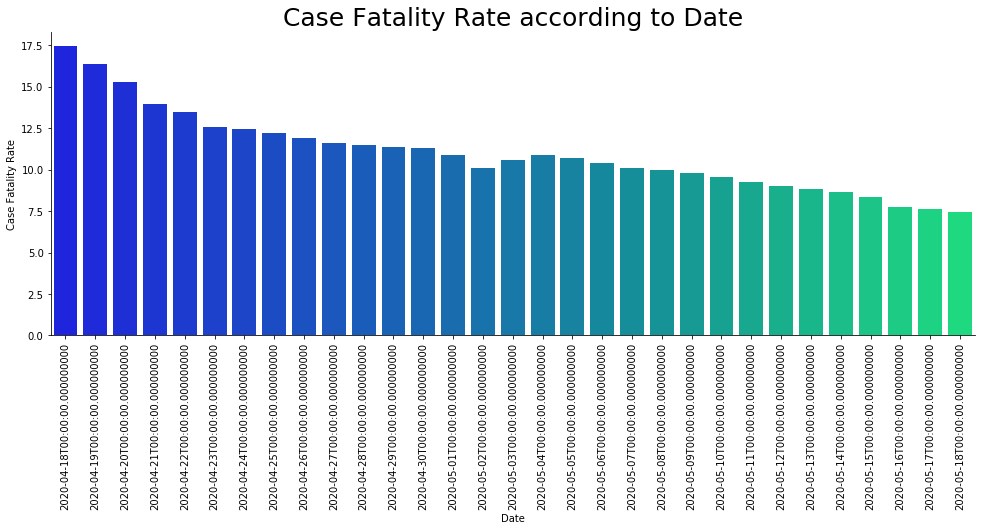

In [51]:
#Factor plot of Case Fatality rate
sns.factorplot(x="Date", y="CFR", data=India, kind="bar", size = 5, palette = "winter", aspect=3)
plt.title('Case Fatality Rate according to Date',fontsize=25)
plt.ylabel("Case Fatality Rate")
plt.xticks(rotation='vertical')
plt.show()

Observation:
    
    Case Fatality Rate (CFR) is decreasing in India day by day means maximum no of people recovered from this disease.

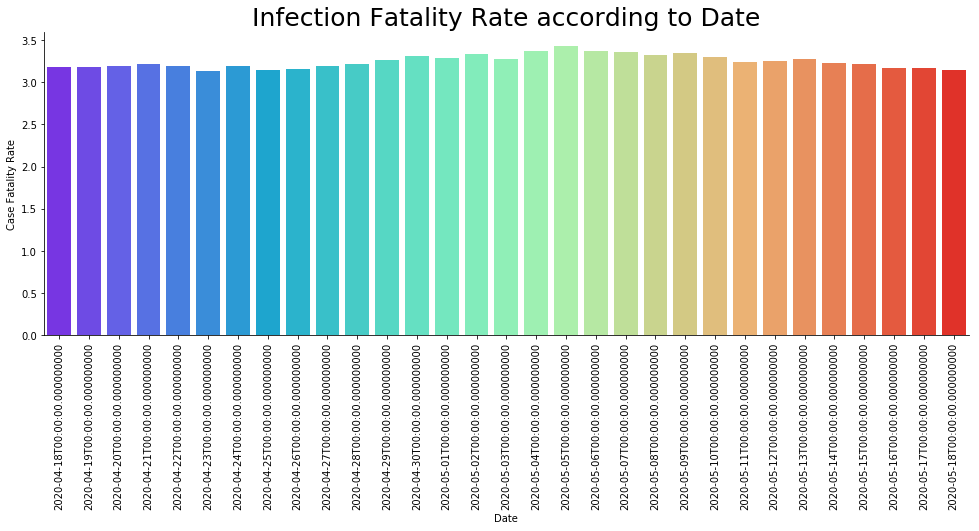

In [52]:
#Factor plot of Infection Fatality rate
sns.factorplot(x="Date", y="IFR", data=India, kind="bar", size = 5, palette = "rainbow", aspect=3)
plt.title('Infection Fatality Rate according to Date',fontsize=25)
plt.ylabel("Case Fatality Rate")
plt.xticks(rotation='vertical')
plt.show()

Observation:
    
    Infection Fatality Rate (IFR) is almost same for all the date means this disease is transfered from one person to 
    another person very fast.

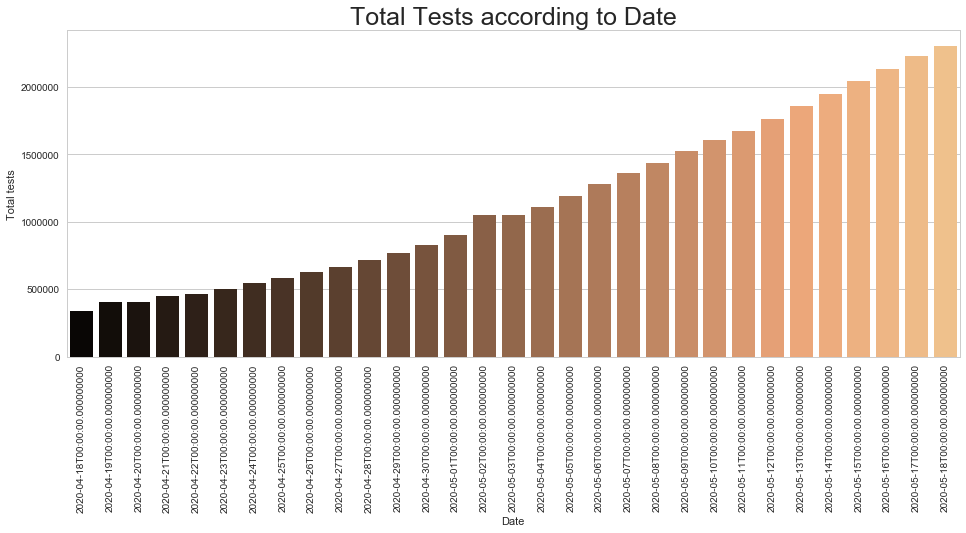

In [53]:
#Factor plot for total tests according to date
sns.set(style='whitegrid')
plt.figure(figsize=(16,6))
sns.barplot(x='Date',y='Total Tests',data=India,palette='copper')
plt.title('Total Tests according to Date',fontsize=25)
plt.ylabel("Total tests")
plt.xticks(rotation='vertical')
plt.show()

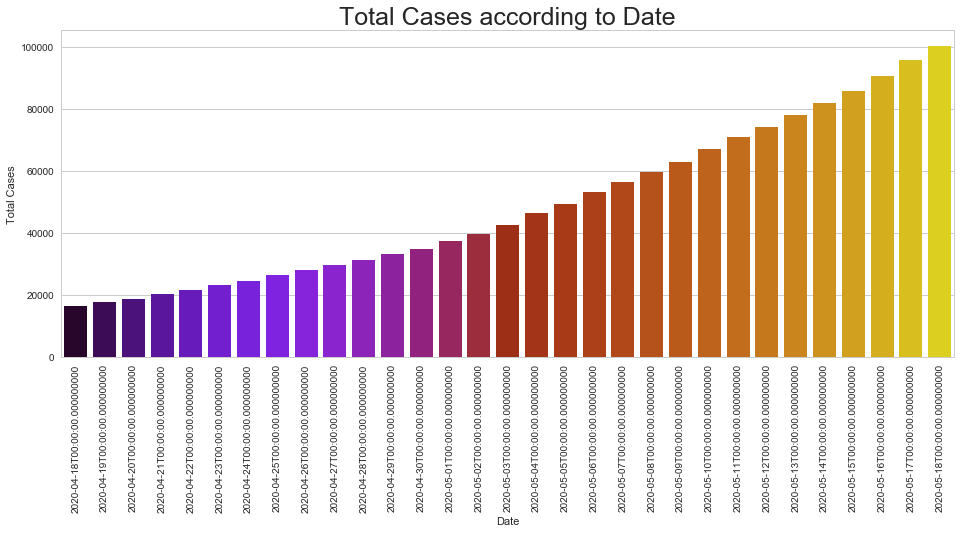

In [54]:
#Factorplot of total case according to date
sns.set(style='whitegrid')
plt.figure(figsize=(16,6))
sns.barplot(x='Date',y='Total Cases',data=India,palette='gnuplot')
plt.title('Total Cases according to Date',fontsize=25)
plt.ylabel("Total Cases")
plt.xticks(rotation='vertical')
plt.show()

Observation:
    
    From the above two graphs it is clearly shows that to number of COVID testing is increases day by day and as the 
    number of test increases the total cases also increases.

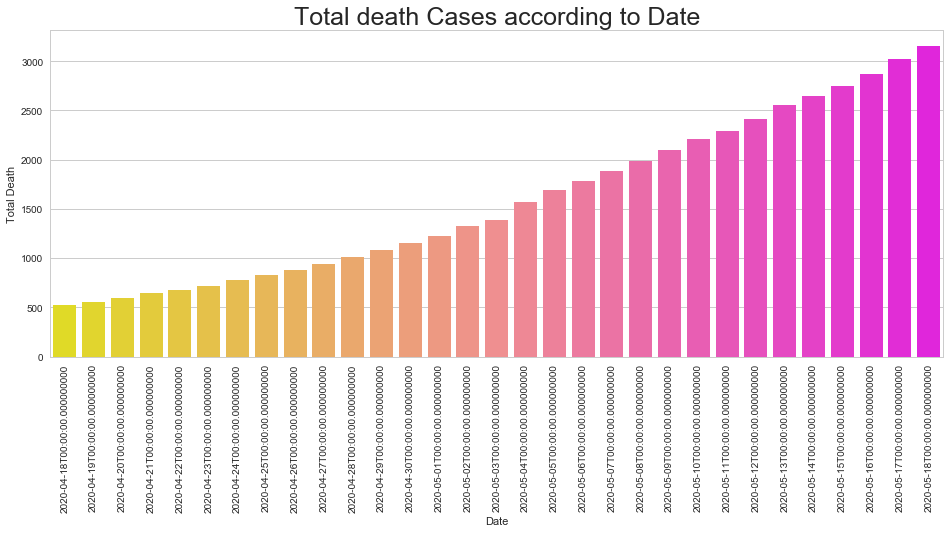

In [55]:
#Factorplot of total death case according to date
sns.set(style='whitegrid')
plt.figure(figsize=(16,6))
sns.barplot(x='Date',y='Total Deaths',data=India,palette='spring_r')
plt.title('Total death Cases according to Date',fontsize=25)
plt.ylabel("Total Death")
plt.xticks(rotation='vertical')
plt.show()

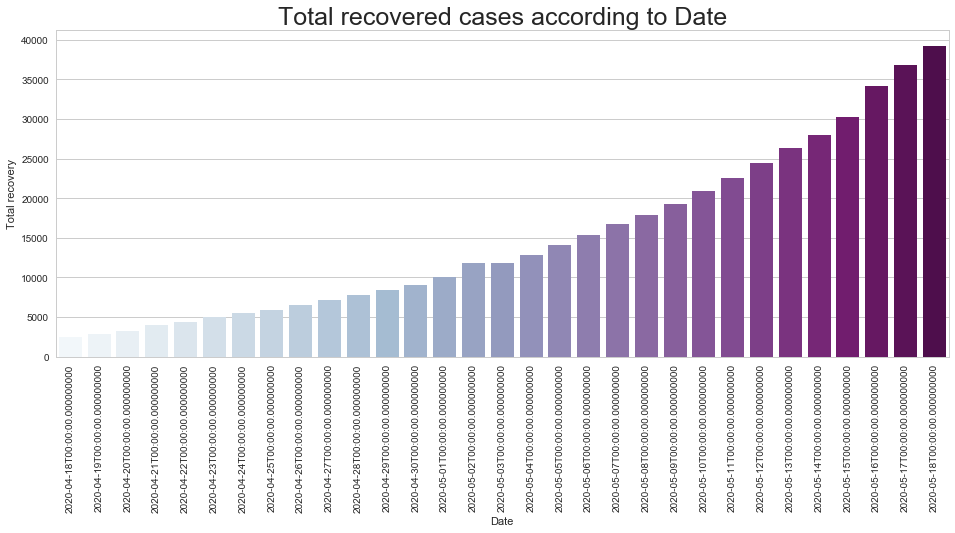

In [56]:
#Factorplot of total recovered cases according to date
sns.set(style='whitegrid')
plt.figure(figsize=(16,6))
sns.barplot(x='Date',y='Total Recovered',data=India,palette='BuPu')
plt.title('Total recovered cases according to Date',fontsize=25)
plt.ylabel("Total recovery")
plt.xticks(rotation='vertical')
plt.show()

Observation:
    
    As the COVID case increases number of death is also increases but we can also see that maximum number of people
    recovered from this disease so the recovery rate is also increases.

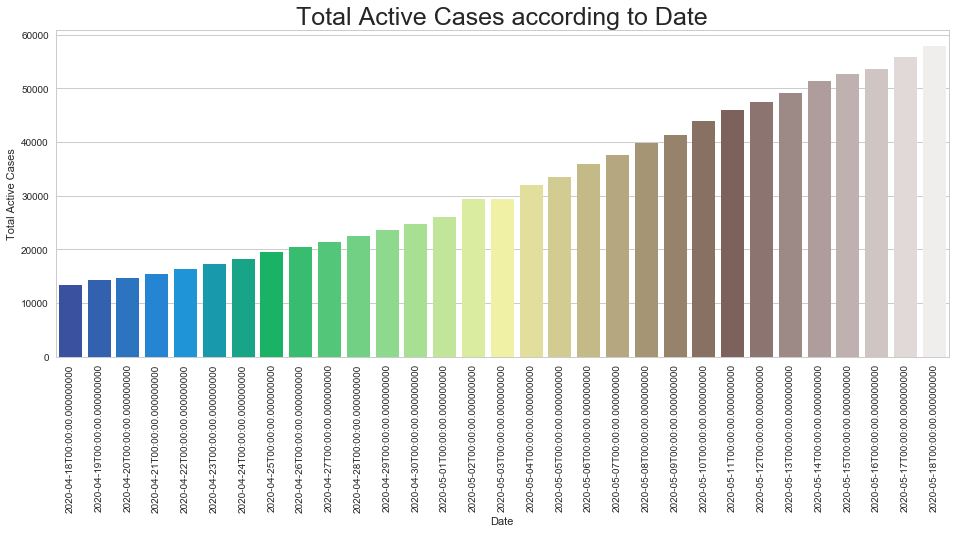

In [57]:
#Factorplot of total active cases according to date
sns.set(style='whitegrid')
plt.figure(figsize=(16,6))
sns.barplot(x='Date',y='Active Cases',data=India,palette='terrain')
plt.title('Total Active Cases according to Date',fontsize=25)
plt.ylabel("Total Active Cases")
plt.xticks(rotation='vertical')
plt.show()

Observation:
    
    As the number of COVID test increases, number of active case also increases.

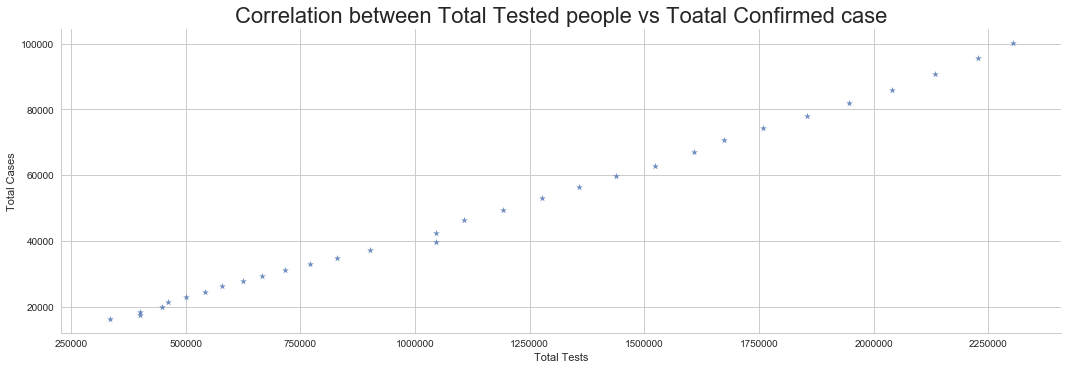

In [58]:
#Correlation between number of people tested and Confirmed cases..
sns.set(style='whitegrid')
sns.lmplot(x='Total Tests',y='Total Cases',data=India,markers=['*'],aspect=3,fit_reg=False)
plt.title('Correlation between Total Tested people vs Toatal Confirmed case',fontsize=22)
plt.show()

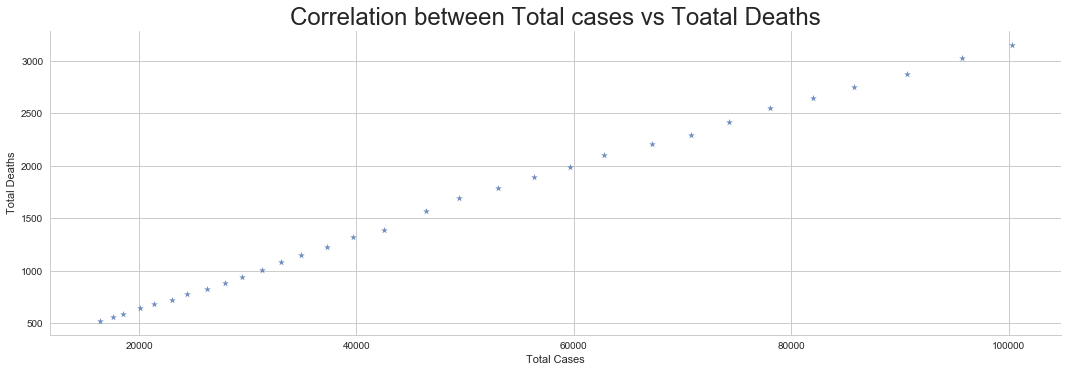

In [59]:
#Correlation between Total case vs total death.
sns.set(style='whitegrid')
sns.lmplot(x='Total Cases',y='Total Deaths',data=India,markers=['*'],aspect=3,fit_reg=False)
plt.title('Correlation between Total cases vs Toatal Deaths',fontsize=24)
plt.show()

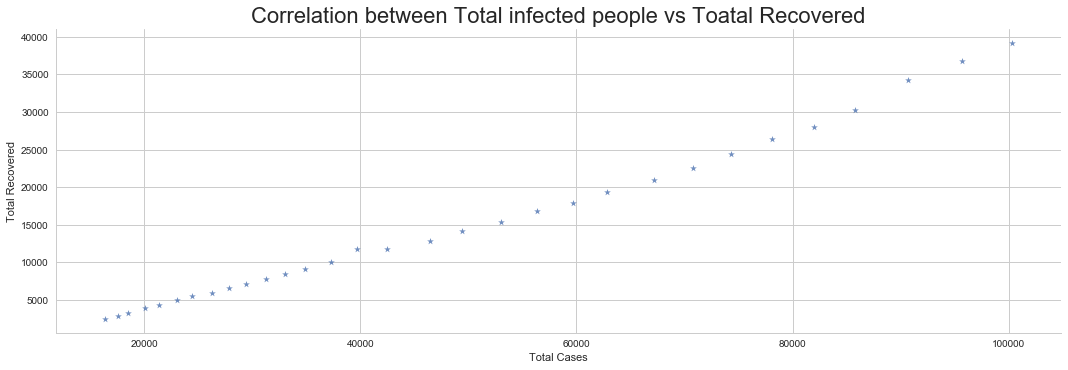

In [60]:
#Correlation between Toatl case vs Total recovery
sns.set(style='whitegrid')
sns.lmplot(y='Total Recovered',x='Total Cases',data=India,markers=['*'],aspect=3,fit_reg=False)
plt.title('Correlation between Total infected people vs Toatal Recovered',fontsize=22)
plt.show()

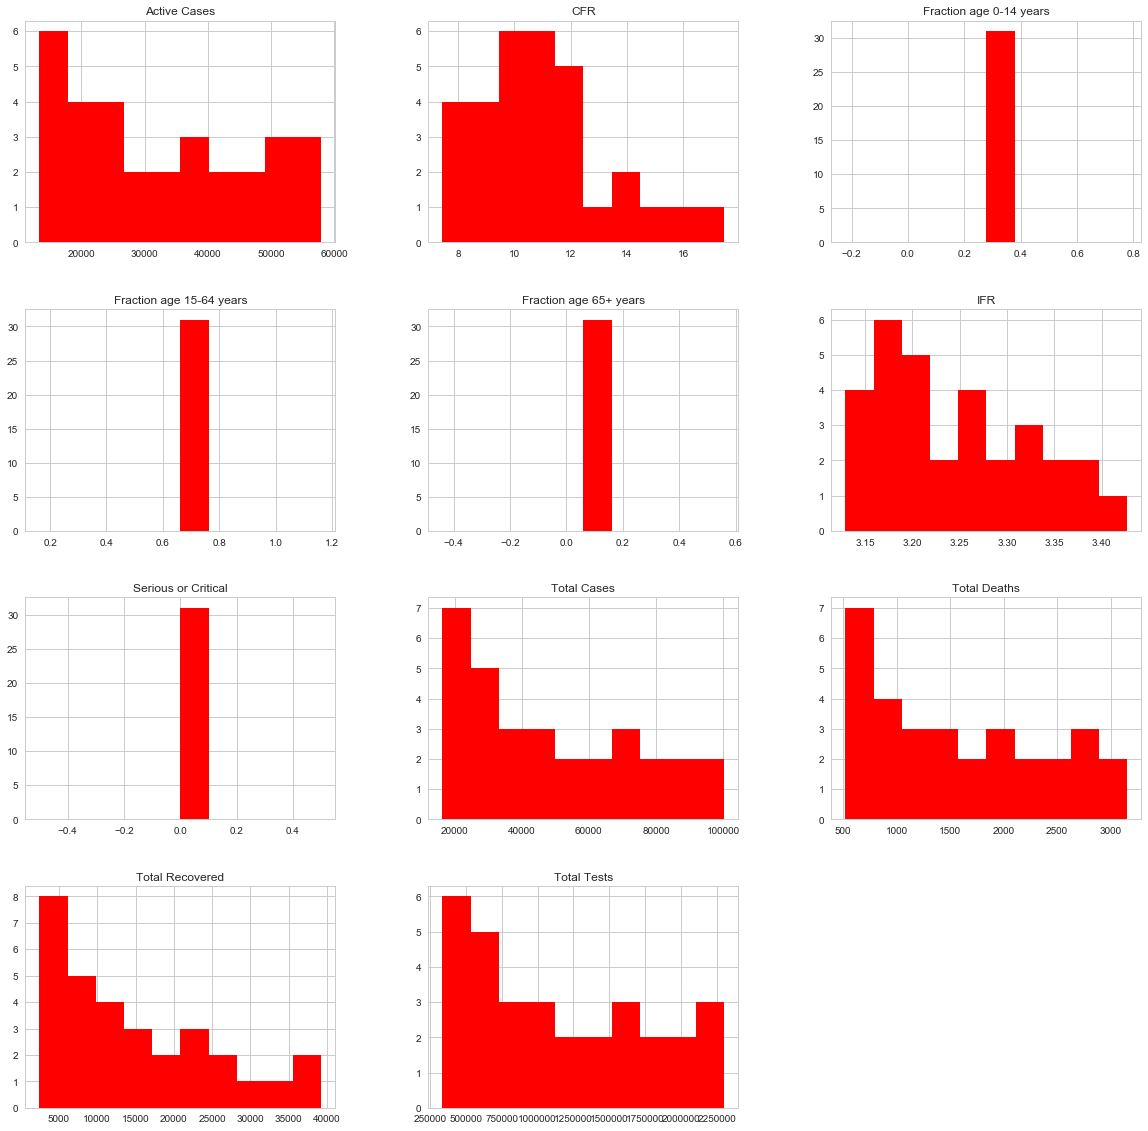

In [61]:
#Plotting the Histogram
India.hist(figsize=(20,20),color='r')
plt.show()

Observation:

    1-Most of the distributions are right-skewed (e.g. Total Tests, Total Recovered ).

    3.Fraction age 0-14 years, Fraction age 15-64 years and Fraction age 65+ are constant values for approx all cases.
      They're likely to be redundant features.

### We can see some other country data same as it is.

# To Check the skewness

### To check the distribution of skewness

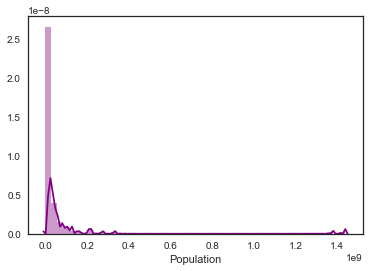

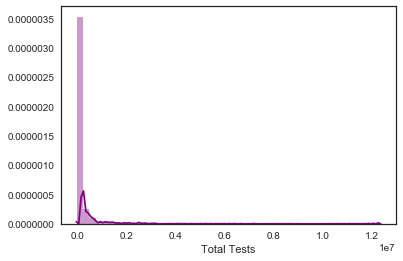

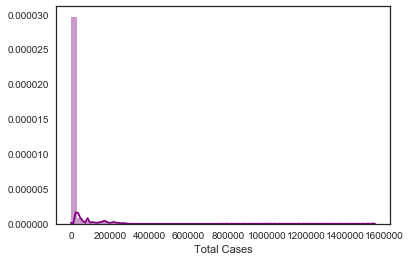

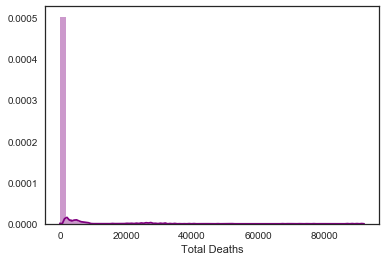

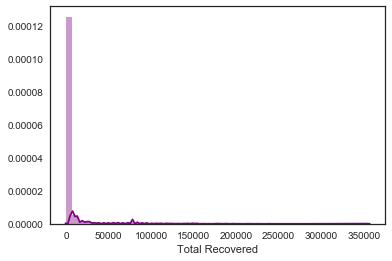

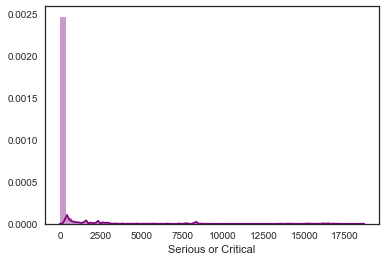

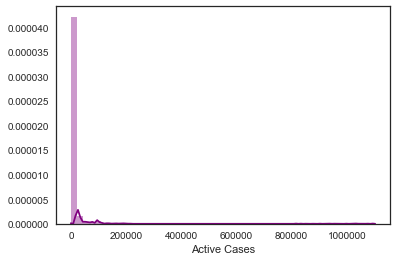

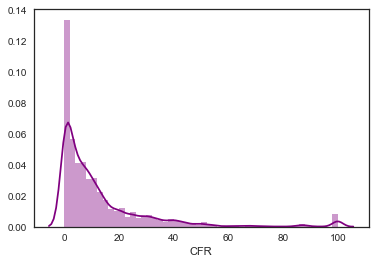

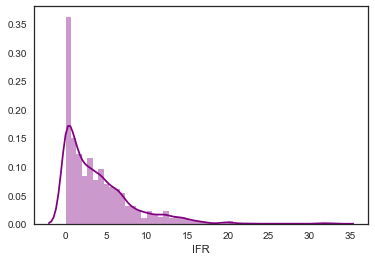

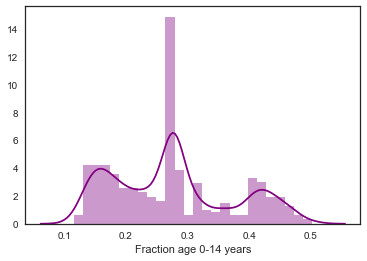

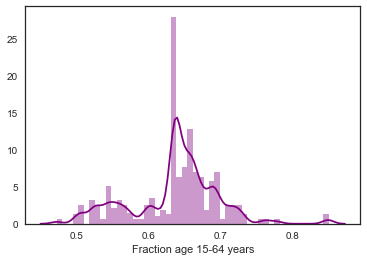

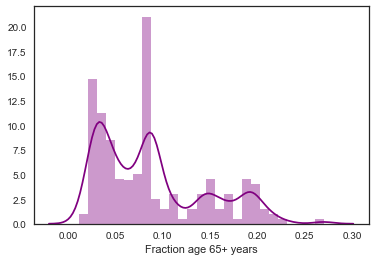

In [62]:
#Distribution plot
#In for loop we give describe() function to descriminate numeric columns from categorical columns.
#Because describe() function give the summary of numeric columns
for i in df.describe().columns:
    sns.set(style='white')
    sns.distplot(df[i],color='purple')
    plt.show()

In [63]:
#Checking the skewness
df.skew()

Population                   8.627114
Total Tests                  9.183581
Total Cases                 11.919786
Total Deaths                 8.846549
Total Recovered              7.125137
Serious or Critical          9.120206
Active Cases                13.123256
CFR                          2.756602
IFR                          1.914062
Fraction age 0-14 years      0.423808
Fraction age 15-64 years    -0.159482
Fraction age 65+ years       0.820231
dtype: float64

In [64]:
#Removing skewness via log method

df['Population']=np.sqrt(df['Population'])
df['Total Tests']=np.sqrt(df['Total Tests'])
df['Total Cases']=np.sqrt(df['Total Cases'])
df['Total Deaths']=np.sqrt(df['Total Deaths'])
df['Total Recovered']=np.sqrt(df['Total Recovered'])
df['Serious or Critical']=np.sqrt(df['Serious or Critical'])
df['Active Cases']=np.sqrt(df['Active Cases'])
df['CFR']=np.sqrt(df['CFR'])
df['IFR']=np.sqrt(df['IFR'])

In [65]:
#Again checking the skewness
df.skew()

Population                  3.970068
Total Tests                 3.465926
Total Cases                 4.737369
Total Deaths                4.704644
Total Recovered             3.742607
Serious or Critical         4.907634
Active Cases                6.011231
CFR                         0.895668
IFR                         0.238861
Fraction age 0-14 years     0.423808
Fraction age 15-64 years   -0.159482
Fraction age 65+ years      0.820231
dtype: float64

In [66]:
#Again Removing skewness
df['Population']=np.sqrt(df['Population'])
df['Total Tests']=np.sqrt(df['Total Tests'])
df['Total Cases']=np.sqrt(df['Total Cases'])
df['Total Deaths']=np.sqrt(df['Total Deaths'])
df['Total Recovered']=np.sqrt(df['Total Recovered'])
df['Serious or Critical']=np.sqrt(df['Serious or Critical'])
df['Active Cases']=np.sqrt(df['Active Cases'])

In [67]:
#Checking the skewness again
df.skew()

Population                  1.177466
Total Tests                 0.991794
Total Cases                 1.903406
Total Deaths                2.179116
Total Recovered             1.900393
Serious or Critical         1.920480
Active Cases                1.988327
CFR                         0.895668
IFR                         0.238861
Fraction age 0-14 years     0.423808
Fraction age 15-64 years   -0.159482
Fraction age 65+ years      0.820231
dtype: float64

In [68]:
#Again Removing skewness
df['Population']=np.sqrt(df['Population'])
df['Total Tests']=np.sqrt(df['Total Tests'])
df['Total Cases']=np.sqrt(df['Total Cases'])
df['Total Deaths']=np.sqrt(df['Total Deaths'])
df['Total Recovered']=np.sqrt(df['Total Recovered'])
df['Serious or Critical']=np.sqrt(df['Serious or Critical'])
df['Active Cases']=np.sqrt(df['Active Cases'])

In [69]:
df.skew()

Population                  0.177432
Total Tests                -0.437516
Total Cases                 0.946870
Total Deaths                0.142978
Total Recovered             0.690005
Serious or Critical         0.220291
Active Cases                0.344986
CFR                         0.895668
IFR                         0.238861
Fraction age 0-14 years     0.423808
Fraction age 15-64 years   -0.159482
Fraction age 65+ years      0.820231
dtype: float64

# Plotting Outliers

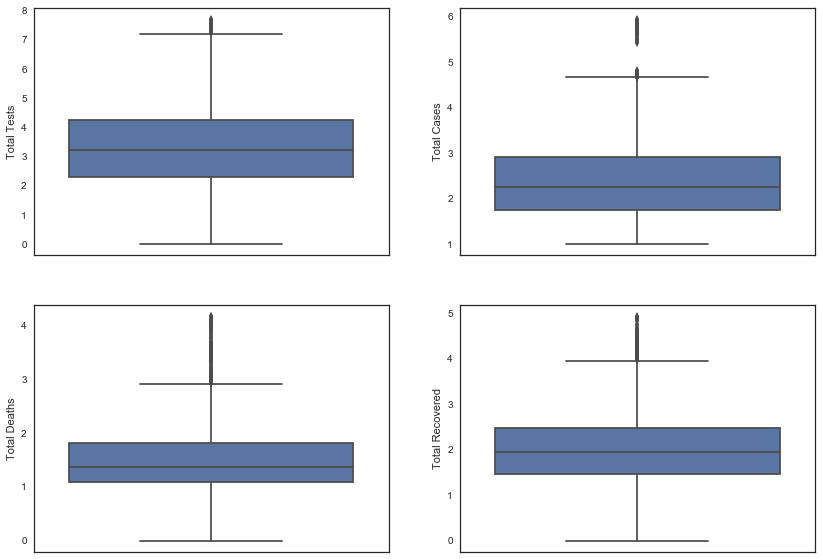

In [70]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (14, 10))
sns.boxplot(ax=ax1, y = 'Total Tests', data = df)
sns.boxplot(ax=ax2, y = 'Total Cases', data = df)
sns.boxplot(ax=ax3, y = 'Total Deaths',  data = df)
sns.boxplot(ax=ax4, y = 'Total Recovered',  data = df)

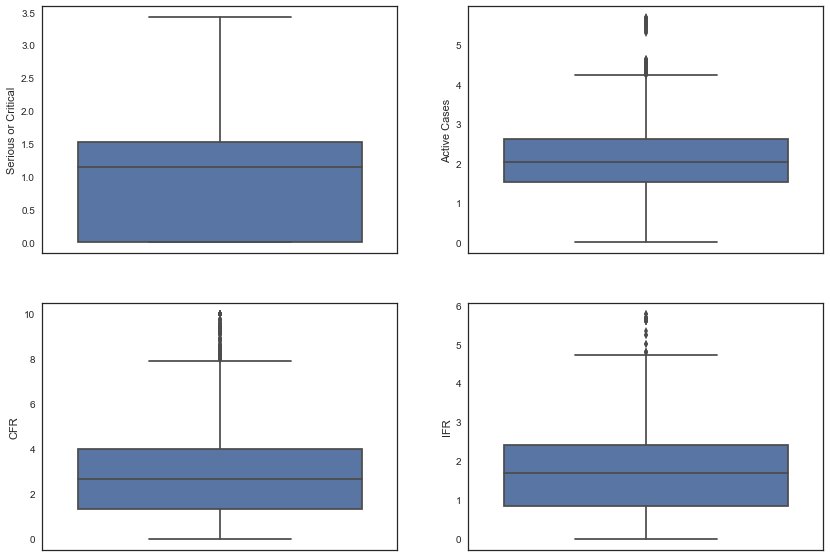

In [71]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (14, 10))
sns.boxplot(ax=ax1, y = 'Serious or Critical', data = df)
sns.boxplot(ax=ax2, y = 'Active Cases', data = df)
sns.boxplot(ax=ax3, y = 'CFR',  data = df)
sns.boxplot(ax=ax4, y = 'IFR',  data = df)

Observation:
    
    From the above graphs it os clearly shown as there are some outliers present in our dataset which needs to be 
    removed.

# Removing Outliers

In [72]:
#Copying the dataset
df1=df.copy()

In [73]:
#Dropping Date and Country column 
df1.drop(columns=['Date','Country'],axis=1,inplace=True)
df1.head()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,CFR,IFR,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,11.612923,6.627491,5.414586,3.748889,4.020480,3.284705,5.309424,6.030381,2.297995,0.189,0.657,0.154
1,11.612923,6.658022,5.437193,3.767063,4.040263,3.285160,5.330942,6.029274,2.304160,0.189,0.657,0.154
2,11.612923,6.692896,5.462515,3.789365,4.050038,3.296671,5.356637,6.082755,2.315770,0.189,0.657,0.154
3,11.612923,6.725785,5.484582,3.819740,4.119404,3.298588,5.369028,5.944590,2.352672,0.189,0.657,0.154
4,11.612923,6.753090,5.509287,3.843865,4.126361,3.298588,5.394367,6.015403,2.369687,0.189,0.657,0.154


In [74]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[2.21153657, 2.14065662, 3.57765095, ..., 0.87937198, 0.33041308,
        1.14656029],
       [2.21153657, 2.15903661, 3.60440203, ..., 0.87937198, 0.33041308,
        1.14656029],
       [2.21153657, 2.1800319 , 3.63436672, ..., 0.87937198, 0.33041308,
        1.14656029],
       ...,
       [1.70052595, 0.5941001 , 1.34921624, ..., 0.01740006, 0.01366912,
        0.01499046],
       [1.70052595, 0.5941001 , 1.34921624, ..., 0.01740006, 0.01366912,
        0.01499046],
       [1.70052595, 0.5941001 , 1.34921624, ..., 0.01740006, 0.01366912,
        0.01499046]])

In [75]:
threshold=3
print(np.where(z>3))

(array([   0,    0,    1,    1,    2,    2,    3,    3,    4,    4,    5,
          5,    6,    6,    6,    7,    7,    7,    8,    8,    8,    9,
          9,    9,    9,   10,   10,   10,   10,   11,   11,   11,   11,
         12,   12,   12,   12,   13,   13,   13,   13,   14,   14,   14,
         14,   15,   15,   15,   15,   16,   16,   16,   16,   17,   17,
         17,   17,   18,   18,   18,   18,   19,   19,   19,   19,   20,
         20,   20,   20,   21,   21,   21,   21,   22,   22,   22,   22,
         23,   23,   23,   23,   24,   24,   24,   24,   25,   25,   25,
         25,   26,   26,   26,   26,   27,   27,   27,   27,   28,   28,
         28,   28,   29,   29,   29,   29,   30,   30,   30,   30,   74,
         75,   76,   77,   78,   79,   80,   81,   82,   83,   84,   85,
         86,   87,   88,   89,   90,   91,   92,  124,  125,  126,  127,
        128,  129,  130,  131,  132,  133,  134,  135,  136,  137,  138,
        139,  140,  141,  142,  143,  144,  145,  

In [76]:
df1_new=df1[(z<3).all(axis=1)]

In [77]:
print(df1.shape,'\t',df1_new.shape)

(6427, 12) 	 (6072, 12)


In [78]:
df1=df1_new
df1.shape

(6072, 12)

# Model Training

In [79]:
df1.head()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,CFR,IFR,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
31,10.48376,6.065442,3.721523,2.050893,2.726854,1.29684,3.677102,3.047595,0.922337,0.176,0.682,0.142
32,10.48376,6.109072,3.793129,2.087798,2.752111,1.29684,3.751130,3.144041,0.917832,0.176,0.682,0.142
33,10.48376,6.152577,3.838414,2.118029,2.767989,2.26797,3.797724,3.242954,0.927087,0.176,0.682,0.142
34,10.48376,6.185399,3.893061,2.149664,2.808704,2.26797,3.851623,3.245552,0.929646,0.176,0.682,0.142
35,10.48376,6.223330,3.939377,2.181547,2.855471,2.26797,3.895848,3.224803,0.940478,0.176,0.682,0.142


In [80]:
#Splitting the data into input and output variable.
x=df1.drop(columns=['CFR'],axis=1)
x.head(2)

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,IFR,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
31,10.48376,6.065442,3.721523,2.050893,2.726854,1.29684,3.677102,0.922337,0.176,0.682,0.142
32,10.48376,6.109072,3.793129,2.087798,2.752111,1.29684,3.751130,0.917832,0.176,0.682,0.142


In [81]:
y=df1['CFR']
y.head()

31    3.047595
32    3.144041
33    3.242954
34    3.245552
35    3.224803
Name: CFR, dtype: float64

In [82]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(6072, 11) 		 (6072,)


In [83]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [84]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [85]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(4736, 11) 		 (1336, 11)


In [86]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(4736,) 	 (1336,)


In [87]:
#Importing all the model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [88]:
# All Algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) is: 0.9324207458961928
MAE: 0.335695985804301
MSE: 0.24161181792023426
RMSE: 0.49154025055964057
R2_score: 0.9367059568696943
*****************************************************************************************


Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 0.9911792784274609
MAE: 0.09708755028075793
MSE: 0.033006855222254695
RMSE: 0.1816778886443111
R2_score: 0.9913533314056564
*****************************************************************************************


Score of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [89]:
# Cross Validate All Algorithm by using for loop
from sklearn.model_selection import cross_val_score

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor()]


for m in model:
    score=cross_val_score(m,x,y,cv=15,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Score: [0.84251103 0.90842657 0.95774165 0.96277402 0.94614323 0.95574837
 0.9138884  0.9022622  0.90443759 0.81200877 0.90904613 0.89352962
 0.92315858 0.90169139 0.88515377]
Mean Score: 0.9079014203771798
Standard deviation: 0.03982854755872522
************************************************************************************************


Model: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Score: [0.80286688 0.9526763  0.99137089 0.97908027 0.99357139 0.98875122
 0.95874078 0.95912324 0.97841762 0.92207897 0.98126117 0.96987812
 0.97706692 0.98007241 0.97374677]
Mean Score: 0.9605801956431694
Standard deviation: 0.04564617731419466
************************************************************************************************


Model: DecisionTreeRegressor(criterion='mse', max_depth=None, max_featu

From above code SVM, DecissionTree, KNeighbors, Ridge, RandomForest,GradientBoosting,ExtraTrees and BaggingRegressor gives
the best score so we use GridSearchCV to find out the best parameters and the find the best model.

## Using GridSearchCV to find out best parameter

In [90]:
#Using GridSearchCV to find out the best parameter in DecisionTreeRegressor

parameters={'criterion':['friedman_mse','mse','mae'],'random_state':range(42,60)}
dtc=DecisionTreeRegressor()

clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'random_state': 55}


In [91]:
#Using GridSearchCV to find out the best parameter in SVM

parameters={'kernel':('linear','rbf','poly','sigmoid'),'C':[1,10]}
sv=SVR()

clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [92]:
#Using GridSearchCV to find out the best parameter in KNeighborsRegressor

parameters={'n_neighbors':[5,10,15],'weights':('uniform','distance'),'algorithm':('auto','brute','kd_tree','ball_tree')}
knr=KNeighborsRegressor()

clf=GridSearchCV(knr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}


In [93]:
#Using GridSearchCV to find out the best parameter in Ridge

parameters={'alpha':[1,2,3,4,5],'random_state':range(42,60),'solver':('auto','svd','cholesky','lsqr','sparse_cg','sag','saga')}
ridge=Ridge()

clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'alpha': 5, 'random_state': 49, 'solver': 'sag'}


In [94]:
#Using GridSearchCV to find out the best parameters in RandomForestRegressor

parameters={'n_estimators':[10,50,100,200]}
RFR=RandomForestRegressor()

clf=GridSearchCV(RFR,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 200}


In [95]:
#Using GridSearchCV to find out the best parameter in GradientBoostingRegressor

parameters={'n_estimators':[10,100,200,300]}
gbr=GradientBoostingRegressor()

clf=GridSearchCV(gbr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 300}


In [96]:
#Using GridSearchCV to find out the best parameter in BaggingRegressor

parameters={'n_estimators':[10,50,100,200], 'random_state':range(42,60)}
br=BaggingRegressor()

clf=GridSearchCV(br,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 50, 'random_state': 54}


In [97]:
#Using GridSearchCV to find out the best parameters in ExtraTreesRegressor

parameters={'n_estimators':[10,50,100,200]}
etr=ExtraTreesRegressor()

clf=GridSearchCV(RFR,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 200}


## Applying the results in models

In [98]:
KNN=KNeighborsRegressor(algorithm='auto',n_neighbors=15,weights='uniform')

DT=DecisionTreeRegressor(criterion='friedman_mse', random_state=55)

SVR=SVR(kernel='linear',C=1)

Ridge=Ridge(alpha=5,random_state=49,solver='sag')

RF=RandomForestRegressor(n_estimators=50,criterion='mse')

GB=GradientBoostingRegressor(criterion='friedman_mse', random_state=42, learning_rate=0.1, n_estimators=300, max_depth=4)

Bagg=BaggingRegressor(n_estimators=50, max_features=1.0, max_samples=1.0, random_state=54)

ETR=ExtraTreesRegressor(n_estimators=100)

In [99]:
models=[]
models.append(('KNeighborsRegressor',KNN))
models.append(('DecisionTreeRegressor',DT))
models.append(('SupportVectorRegressor',SVR))
models.append(('Ridge',Ridge))
models.append(('RandomForestRegressor',RF))
models.append(('GradientBoostingRegressor',GB))
models.append(('BaggingRegressor',Bagg))
models.append(('ExtraTreesRegressor',ETR))

In [100]:
Model=[]
Score=[]
R2_Score=[]
CVS=[]
MAE=[]
MSE=[]
RMSE=[]

for name,model in models:
    print('******************',name,'*****************************')
    print('\n')
    Model.append(name)
   
    model.fit(x_train,y_train)
    print(model)
    
    #Score
    score=model.score(x_train,y_train)
    print('Score:',score)
    Score.append(score * 100)
    print('\n')
    
    pred=model.predict(x_test)
    print('\n')
    
    #R2_score
    r_score=r2_score(y_test,pred)
    print('R2_score:',r_score)
    R2_Score.append(r_score * 100)
    print('\n')
    
    #Cross Val Score
    cross_val=cross_val_score(model,x,y,cv=15,scoring='r2').mean()
    print('Cross Val Score:',cross_val)
    CVS.append(cross_val * 100)
    print('\n')
    
    #MAE
    mae=mean_absolute_error(y_test,pred)
    print('MAE:',mae)
    MAE.append(mae)
    print('\n')
    
    #MSE
    mse=mean_squared_error(y_test,pred)
    print('MSE:',mse)
    MSE.append(mse)
    print('\n')
    
    #RMSE
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE:',rmse)
    RMSE.append(rmse)
    print('\n\n')

****************** KNeighborsRegressor *****************************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='uniform')
Score: 0.9682559962387056




R2_score: 0.9610824655617738


Cross Val Score: 0.5012197435371706


MAE: 0.19410700076927134


MSE: 0.14855957653447724


RMSE: 0.385434270057136



****************** DecisionTreeRegressor *****************************


DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=55,
           splitter='best')
Score: 0.999999999867251




R2_score: 0.9948614209232136


Cross Val Score: 0.4719661853385144


MAE: 0.05136882363154027


MSE: 0.019615454644179343


RMSE: 0.14005518428169428



*

In [102]:
#Storing the result in a dataframe
result=pd.DataFrame({'Model':Model,'Score':Score,'R2_Score':R2_Score,'Cross_Val_Score':CVS,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
result

,Model,Score,R2_Score,Cross_Val_Score,MAE,MSE,RMSE
0,KNeighborsRegressor,96.825600,96.108247,50.121974,0.194107,0.148560,0.385434
1,DecisionTreeRegressor,100.000000,99.486142,47.196619,0.051369,0.019615,0.140055
2,SupportVectorRegressor,92.777137,93.282533,90.648085,0.324620,0.256425,0.506385
3,Ridge,93.207940,93.660355,90.935541,0.339757,0.242003,0.491938
4,RandomForestRegressor,99.940284,99.715910,78.808862,0.045210,0.010845,0.104137
5,GradientBoostingRegressor,99.881951,99.613052,88.780343,0.071319,0.014771,0.121536
6,BaggingRegressor,99.932795,99.673414,78.161560,0.046483,0.012467,0.111654
7,ExtraTreesRegressor,100.000000,99.919375,80.383644,0.024075,0.003078,0.055477


### From this tabel we can clearly see all the models with its result. We can choose the model which gives best result.

## I Choose GradientBoostingRegressor as my final model.

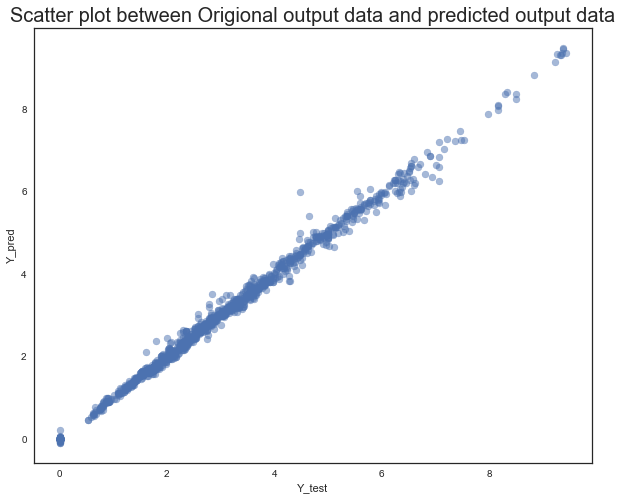

In [103]:
#Scatter plot between origional output data and predicted output data for GradientBoostingRegressor
plt.figure(figsize=(10,8))
plt.scatter(y_test, GB.predict(x_test), alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between Origional output data and predicted output data",fontsize=20)
plt.show()

In [104]:
#Saving the model
#Importing joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(GB,'Country_wise_COVID_gbr.pkl')

['Country_wise_COVID_gbr.pkl']